<a href="https://colab.research.google.com/github/Ivet566/DATA/blob/main/Copy_of_Log_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Techniques in Regression Analysis

## Log Transformation

### Definition
Applying a logarithm to a variable to stabilize variance and make the data more normal distribution-like.

### Purpose
- Reduce skewness.
- Handle exponential growth.
- Address heteroscedasticity.


### Code Example


In [ ]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [ ]:
# original x
x = np.arange(0, 10, 0.5)
# natural exponential function applied to x
e_x = np.exp(x)

In [ ]:
# natural log of natural exponent of x
ln_e_x = np.log(e_x)

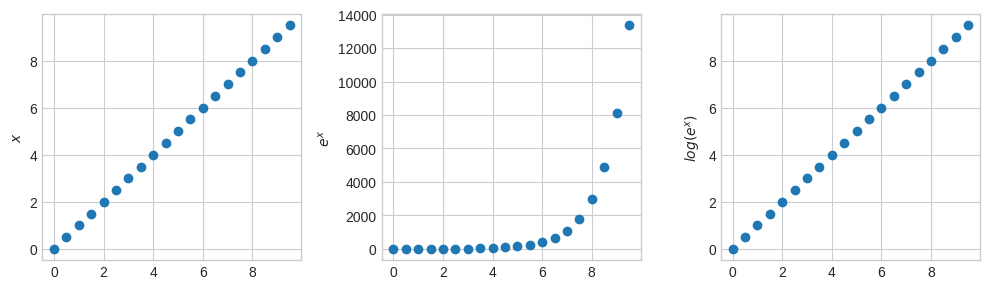

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,3))

ax1.scatter(x, x)
ax1.set_ylabel("$x$")
ax2.scatter(x, e_x)
ax2.set_ylabel("$e^x$")
ax3.scatter(x, ln_e_x)
ax3.set_ylabel("$log(e^x)$")

fig.tight_layout();

The reason you would apply a log transformation is that you are trying to go from the middle graph (exponential relationship) to the graph on the right (linear relationship).



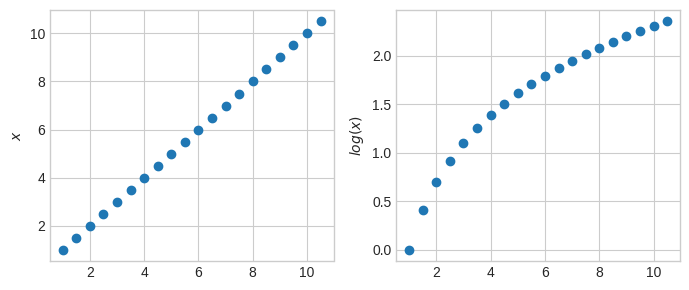

In [ ]:
# natural log of x (adding 1 because log(0) is undefined)
ln_x = np.log(x + 1)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 3))

ax1.scatter(x + 1, x + 1)
ax1.set_ylabel("$x$")
ax2.scatter(x + 1, ln_x)
ax2.set_ylabel("$log(x)$")

fig.tight_layout();

If you see something like the plot on the right after you perform the log transformation, then a log transformation was probably not the appropriate approach

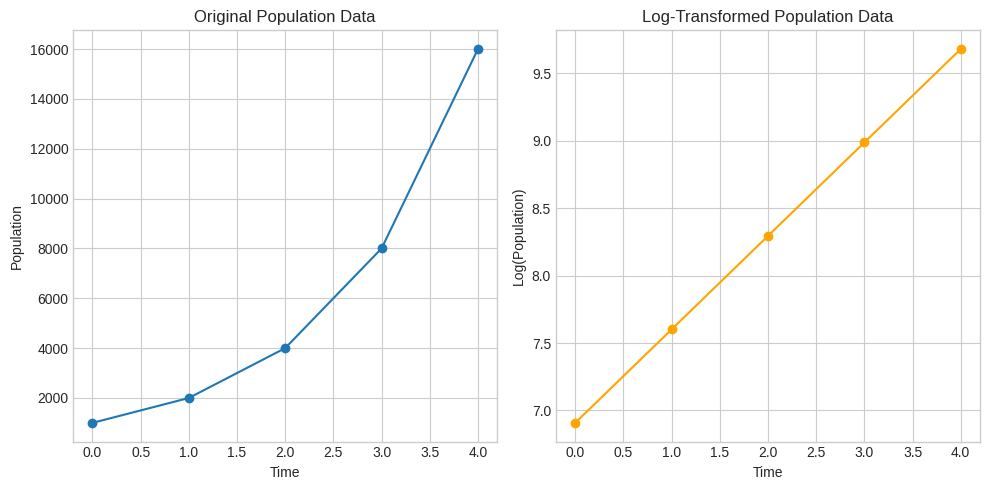

In [ ]:

# Sample data: city populations
populations = np.array([1000, 2000, 4000, 8000, 16000])

# Applying log transformation
log_populations = np.log(populations)

# Plotting original vs log-transformed data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(populations, marker='o')
plt.title('Original Population Data')
plt.xlabel('Time')
plt.ylabel('Population')

plt.subplot(1, 2, 2)
plt.plot(log_populations, marker='o', color='orange')
plt.title('Log-Transformed Population Data')
plt.xlabel('Time')
plt.ylabel('Log(Population)')

plt.tight_layout()
plt.show()

### Polynomial Regression

### Definition
Extends linear regression by adding polynomial terms to model non-linear relationships.

### Purpose
Capture curvature in the data.
Improve fit for non-linear trends.

###Example
Quadratic:
𝑦 = 𝛽0 + 𝛽1𝑥 + 𝛽2𝑥2 + 𝜖

Cubic:
𝑦 = 𝛽0 + 𝛽1𝑥 + 𝛽2𝑥2 + 𝛽3𝑥3 + 𝜖


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Example data
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [1.2, 1.8, 3.6, 4.5, 5.1]
})

# Polynomial transformation
# Transform the data to include polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['x']])

# Fit regression model
model = LinearRegression().fit(X_poly, data['y'])

# Coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.          1.43571429 -0.06428571]
Intercept: -0.3599999999999901


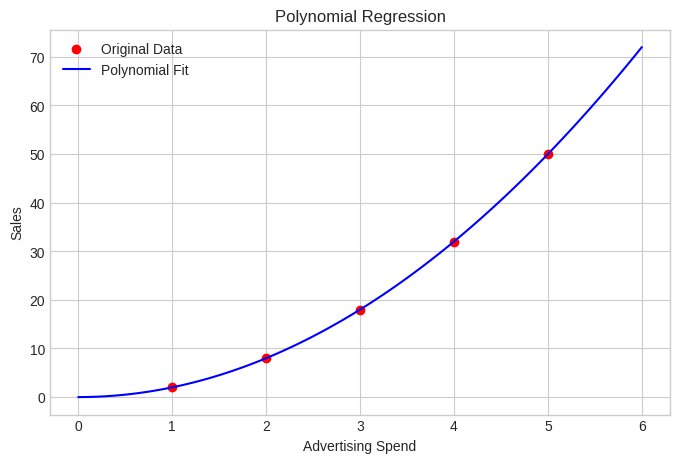

In [ ]:
# Sample data: advertising spend vs. sales
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 8, 18, 32, 50])

# Polynomial feature transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
X_fit = np.linspace(0, 6, 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_pred = model.predict(X_fit_poly)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='Original Data')
plt.plot(X_fit, y_pred, color='blue', label='Polynomial Fit')
plt.title('Polynomial Regression')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Interaction Effects
### Definition

Occur when the effect of one independent variable on the dependent variable depends on the level of another independent variable.

### Purpose

Capture combined effects of variables.
Improve model accuracy.

### Example

𝑦=𝛽0 +𝛽1𝑥1 +𝛽2𝑥2 + 𝛽3(𝑥1 × 𝑥2) + 𝜖


### Interpretation

Significant interaction term indicates the effect of one variable depends on another.

### Purpose:
They help in capturing situations where the effect of one predictor on the dependent variable depends on the level of another predictor.

### When to Use Interaction Terms
Theory or Hypothesis: Use interaction terms if you have a theoretical reason to believe that the effect of one predictor on the dependent variable changes depending on the level of another predictor.
### Model Diagnostics:
After fitting a model, if residuals suggest that the relationship is not well captured, adding interaction terms may improve model fit.



In [ ]:
import statsmodels.formula.api as smf

# Example data
data = pd.DataFrame({
    'x1': [1, 2, 3, 4, 5],
    'x2': [5, 4, 3, 2, 1],
    'y': [1.2, 2.3, 3.4, 2.5, 3.6]
})

# Fit regression model with interaction
model = smf.ols('y ~ x1 * x2', data=data).fit()

# Summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     3.047
Date:                Thu, 08 Aug 2024   Prob (F-statistic):              0.247
Time:                        05:03:27   Log-Likelihood:                -2.8471
No. Observations:                   5   AIC:                             11.69
Df Residuals:                       2   BIC:                             10.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0842      0.068      1.230      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
data['interaction'] = data['x1'] * data['x2']
import statsmodels.formula.api as smf
model = smf.ols('y ~ x1 * x2', data=data).fit()  # This includes x1, x2, and x1:x2 interaction


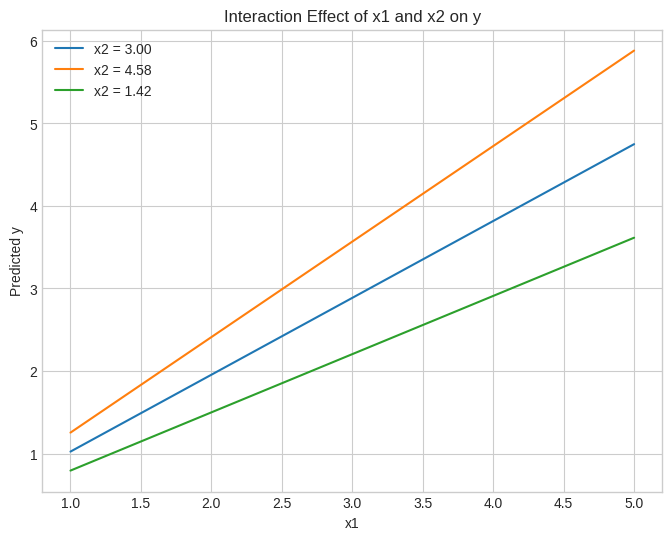

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for plot
x1_range = np.linspace(data['x1'].min(), data['x1'].max(), 100)
x2_levels = [data['x2'].mean(), data['x2'].mean() + data['x2'].std(), data['x2'].mean() - data['x2'].std()]

plt.figure(figsize=(8, 6))
for x2 in x2_levels:
    y_pred = model.params['Intercept'] + model.params['x1'] * x1_range + model.params['x2'] * x2 + model.params['x1:x2'] * x1_range * x2
    plt.plot(x1_range, y_pred, label=f'x2 = {x2:.2f}')
plt.xlabel('x1')
plt.ylabel('Predicted y')
plt.title('Interaction Effect of x1 and x2 on y')
plt.legend()
plt.show()


### Slope Differences:
The differences in the slopes of the lines for different levels of
𝑥
2
x2 indicate the interaction effect. A steeper or flatter slope at different
𝑥
2
x2 levels suggests that the effect of
𝑥
1
x1 on
𝑦
y is moderated by
𝑥
2
x2.
### Interaction Term Significance:
If the interaction term
𝛽
3
β
3
​
  is statistically significant, it indicates that the relationship between
𝑥
1
x1 and
𝑦
y changes depending on the level of
𝑥
2
x2.

### Summary
####Log Transformation:
Useful for stabilizing variance and normalizing data.
####Interaction Effects:
Capture the combined effect of multiple predictors.
#### Polynomial Regression:
Models non-linear relationships by adding polynomial terms.


### Conclusion
These techniques enhance the flexibility and accuracy of regression models, allowing for better representation of real-world data patterns.

## Linear Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sample data: test scores
scores = np.array([[70], [85], [90], [78], [92]])

# Scaling the scores
scaler = StandardScaler()
scaled_scores = scaler.fit_transform(scores)

print("Original Scores:\n", scores)
print("Scaled Scores:\n", scaled_scores)

Original Scores:
 [[70]
 [85]
 [90]
 [78]
 [92]]
Scaled Scores:
 [[-1.60506059]
 [ 0.2469324 ]
 [ 0.8642634 ]
 [-0.617331  ]
 [ 1.1111958 ]]
